In [2]:

import os
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification
import numpy as np
from datasets import Dataset, load_metric
import pandas as pd
from transformers import TextClassificationPipeline
from evaluate import evaluator
from datasets import Dataset
import evaluate

2023-02-21 16:54:58.858768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 16:54:59.144935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-21 16:54:59.144970: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-21 16:54:59.186713: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-21 16:55:00.342094: W tensorflow/stream_executor/pla

In [6]:

model = AutoModelForSequenceClassification.from_pretrained('../../../Files/ROBERTA_checkpoint-462')


In [3]:

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512, padding='max_length', truncation=True, add_special_tokens = True, return_tensors='pt')
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join('../../../Files/models/', args.model_dir))


In [16]:
test = pd.read_csv('../../../Files/Submissions/train/test2_v2.csv', sep='|')



In [5]:
data = Dataset.from_pandas(test[['cleanText', 'label']])

In [7]:
myclassifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, truncation=True,  max_length=500, device=0, batch_size=32, return_all_scores=True)

In [18]:
token_data = tokenizer(data['cleanText'])

In [16]:
roc_auc_score = evaluate.load("roc_auc", "multiclass")

In [17]:
results = task_evaluator.compute(
    model_or_pipeline=model,
    data=data,
    metric=roc_auc_score,
    label_mapping={"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2},
    strategy="bootstrap",
    tokenizer=tokenizer,
    n_resamples=10,
    input_column='cleanText',
    label_column='label',
    random_state=0,
    device=1,
)

NameError: name 'task_evaluator' is not defined

In [10]:
results = myclassifier(data['cleanText'])

In [11]:
results[0]

[{'label': 'LABEL_0', 'score': 0.20455265045166016},
 {'label': 'LABEL_1', 'score': 0.7814080119132996},
 {'label': 'LABEL_2', 'score': 0.014039331115782261}]

In [12]:
results[0][1]['score']

0.7814080119132996

In [13]:
0.20455271005630493 + 0.7814079523086548 + 0.014039336703717709

0.9999999990686774

In [14]:
for i, j in test.iterrows():
    test.at[i, 'conf_0'] = results[i][0]['score']
    test.at[i, 'conf_1'] = results[i][1]['score']
    test.at[i, 'conf_2'] = results[i][2]['score']

In [17]:
test.head()

,id,text,url,score,title,author,selftext,permalink,subreddit,created_utc,num_comments,label,Comments,cleanText
0,ni82r5,How Doublethink Brianwashing Works,https://i.redd.it/ah9yjz1ruk071.jpg,1,How Doublethink Brianwashing Works,Nitrosus_,NaN,/r/NoNewNormal/comments/ni82r5/how_doublethink...,NoNewNormal,1621648061,10,1,NaN,doublethink brianwashing work
1,o5riat,Secret Docs Reveal Moderna Sent Coronavirus Va...,https://greatgameindia.com/moderna-vaccine-nor...,1,Secret Docs Reveal Moderna Sent Coronavirus Va...,tarkay,NaN,/r/NoNewNormal/comments/o5riat/secret_docs_rev...,NoNewNormal,1624380349,0,0,NaN,secret doc reveal moderna send coronavirus vac...
2,hc64oz,Why you need to restrict your freedom and stay...,https://ideas.4brad.com/why-you-need-restrict-...,5,Why you need to restrict your freedom and stay...,mblakele,NaN,/r/Coronavirus/comments/hc64oz/why_you_need_to...,Coronavirus,1592591746,8,1,NaN,need restrict freedom stay home
3,hc8raw,49ers player working out in Nashville tests po...,https://profootballtalk.nbcsports.com/2020/06/...,8,49ers player working out in Nashville tests po...,walkinman19,NaN,/r/Coronavirus/comments/hc8raw/49ers_player_wo...,Coronavirus,1592600750,17,1,NaN,[ num]er player work nashville test positive c...
4,kpjfd7,Just an idea Wouldn't it be cheaper and easier...,https://www.reddit.com/r/NoNewNormal/comments/...,1,Just an idea,AdZealousideal5650,Wouldn't it be cheaper and easier to protect t...,/r/NoNewNormal/comments/kpjfd7/just_an_idea/,NoNewNormal,1609674955,10,0,NaN,idea not cheap easy protect elderly vulnerable...


In [ ]:
test.to_csv('../../../Files/Submissions/train/Roberta_C2_v5.csv', sep='|')

### deprecated

In [9]:
#score each submisssion title
results = classifier(testlist)

In [21]:
for i, j in test.iterrows():
    test.at[i, 'conf_0'] = results[i][0]['score']
    test.at[i, 'conf_1'] = results[i][1]['score']
    test.at[i, 'conf_2'] = results[i][2]['score']

In [22]:
test.to_csv('../../../Files/Submissions/train/Roberta_C2_v5.csv', sep='|')

<AxesSubplot:ylabel='Frequency'>

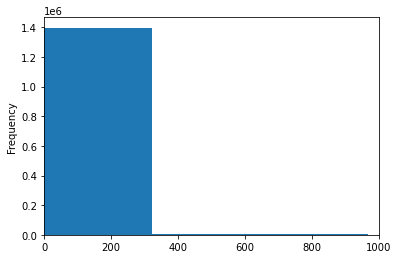

In [20]:
length.plot.hist(bins=100, xlim=(0,1000))

In [6]:
tokens = tokenizer.batch_encode_plus(test.cleanText.values.tolist(), add_special_tokens=True, return_attention_mask=True, padding=True, max_length=512, truncation=True, return_tensors='pt' )

In [9]:
len(tokens.input_ids)

1407749

In [10]:
maxs = 0
avg = 0
for i in tokens.input_ids:
    avg += len(i)
    if len(i) > maxs:
        maxs = len(i)

In [11]:
maxs

512

In [15]:
classifier = TextClassificationPipeline(model=model, device=1)

In [46]:
results = classifier(testlist[0:5000])

In [23]:
results

[[{'label': 'LABEL_0', 'score': 0.204552561044693},
  {'label': 'LABEL_1', 'score': 0.7814080715179443},
  {'label': 'LABEL_2', 'score': 0.014039319008588791}],
 [{'label': 'LABEL_0', 'score': 0.07051552832126617},
  {'label': 'LABEL_1', 'score': 0.05957724526524544},
  {'label': 'LABEL_2', 'score': 0.8699072599411011}],
 [{'label': 'LABEL_0', 'score': 0.08932290971279144},
  {'label': 'LABEL_1', 'score': 0.8983617424964905},
  {'label': 'LABEL_2', 'score': 0.012315403670072556}],
 [{'label': 'LABEL_0', 'score': 0.004957913421094418},
  {'label': 'LABEL_1', 'score': 0.9935616254806519},
  {'label': 'LABEL_2', 'score': 0.0014803741360083222}],
 [{'label': 'LABEL_0', 'score': 0.739377498626709},
  {'label': 'LABEL_1', 'score': 0.10117129236459732},
  {'label': 'LABEL_2', 'score': 0.1594512164592743}],
 [{'label': 'LABEL_0', 'score': 0.7886250019073486},
  {'label': 'LABEL_1', 'score': 0.08490061014890671},
  {'label': 'LABEL_2', 'score': 0.12647439539432526}],
 [{'label': 'LABEL_0', 'sco

In [13]:
model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name, padding="max_length", truncation=True)

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

In [14]:
model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/bert_base_cased_model/fully_trained/checkpoint-3237/')

In [31]:
dirs = 'Submissions/train/test_split_submission_r.pickle'

In [35]:
try: 
    files = os.listdir(os.path.join('../../../Files/', dirs))

    # remove any files that are not in the .pickle type 
    files = [f for f in files if f.endswith('.pickle')]
except FileNotFoundError:
    file = [dirs.split('/')[-1]]

In [4]:
df = pd.read_pickle('../../../Files/Submissions/train/test_split_submission_r.pickle')

In [5]:
df.head()

,author,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,label,text,cleanText
0,Future_Khai,1606789344,k4bf5n,2,/r/aww/comments/k4bf5n/just_my_dog_hanging_wit...,1,,aww,"Just my dog hanging with his bros, Happy Howli...",https://i.imgur.com/vLNjOSH.jpg,1,"Just my dog hanging with his bros, Happy Howli...",dog hang bro happy howliday
1,Plotz50,1610128980,kt7wgq,6,/r/aww/comments/kt7wgq/cat_in_a_colosseum/,9,,aww,Cat in a colosseum,https://i.redd.it/euajbbxle5a61.jpg,1,Cat in a colosseum,cat colosseum
2,LegacyOfDepression,1608036052,kdl0qb,3,/r/aww/comments/kdl0qb/do_it_ike_last_kiss/,1,,aww,Do it ike last kiss.,https://i.redd.it/0y2ifp79jc561.jpg,1,Do it ike last kiss.,ike kiss
3,bejandianaandrei,1606611545,k2zqd5,0,/r/aww/comments/k2zqd5/whats_the_best_thing_af...,1,,aww,what's the best thing after a nap? another nap,https://v.redd.it/ymlbr0n9v2261,1,what's the best thing after a nap? another nap,s good thing nap nap
4,Naiiqiqhq,1609656203,kpfnra,1,/r/NoNewNormal/comments/kpfnra/how_the_fuck_do...,1,Why the fuck are you required to use mask on s...,NoNewNormal,How the fuck does all this make sense ?,https://www.reddit.com/r/NoNewNormal/comments/...,0,How the fuck does all this make sense ? Why th...,fuck sense fuck require use mask place place...


In [15]:
from transformers import TextClassificationPipeline

In [16]:
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [50]:
results = classifier(testlist[:100], top_k=2)

In [9]:
results[0]

[{'label': 'LABEL_1', 'score': 0.9958221912384033},
 {'label': 'LABEL_2', 'score': 0.00371171603910625},
 {'label': 'LABEL_0', 'score': 0.00046611326979473233}]

In [10]:
for i, j in test2.iterrows():
    test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
    test2.at[i, 'conf_1'] = results[i][0]['score']
    test2.at[i, 'pred_2'] = np.int64(results[i][1]['label'][-1])
    test2.at[i, 'conf_2'] = results[i][1]['score']

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'conf_1'] = results[i][0]['score']
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [17]:
test2.loc[ test['label'] == 1, 'label'] = 4
test2.loc[ test['label'] == 0, 'label'] = 1
test.loc[ test['label'] == 4, 'label'] = 0

In [14]:
import pandas as pd
import xgboost as xbg
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_results(y_test, y_pred, model ):
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    y_pred_onehot = pd.get_dummies(y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_onehot, multi_class='ovo')
    print('Model performance for {model}'.format(model=model))
    print('------------------------------------------------')
    print('Accuracy is ', acc)
    print('F1 is ', f1)
    print('ROC AUC Score is ', roc_auc)
    print('------------------------------------------------')

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    df = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    df2 = df.div(df.sum(axis=1), axis=0)
    ax = sns.heatmap(df2)
    ax.set(xlabel='Predicted', ylabel='Actual', title=f'Confusion Matrix for {model}')
    plt.show()

Model performance for BERT
------------------------------------------------
Accuracy is  0.7
F1 is  0.6606848628125224
ROC AUC Score is  0.7680436117936118
------------------------------------------------


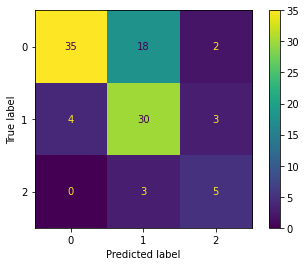

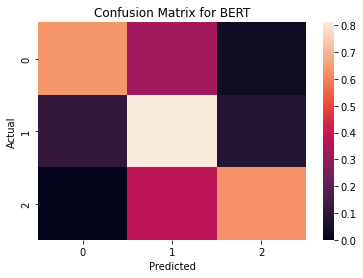

In [18]:
plot_results(test2['label'], test2['pred_1'], 'BERT')

### SLOW WAY, don't look here

In [66]:
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(test))):
    predictions.append(classifier(test[i]))

  0%|          | 3500/1408474 [04:49<32:17:12, 12.09it/s] 


KeyboardInterrupt: 